In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/Users/admin/Documents/GitHub/meters'

# Load libraries

In [2]:
from source.data_preprocess import DataPreprocessing
from source.model_builder import ModelBuilder

# Load data

In [3]:
preprocessor = DataPreprocessing()

data = preprocessor.load_data('data/Meter_A.txt')

         0         1         2         3          4          5         6   \
0  0.841499  1.009367  0.993816  8.469805  10.278727  10.037759  8.501365   
1  0.842250  1.006584  0.996605  7.531891   9.139924   8.951618  7.612213   
2  0.840723  1.011647  0.998152  6.641699   7.975464   7.857692  6.593117   
3  0.841119  1.017807  0.996812  5.687524   6.824334   6.689885  5.615428   
4  0.840358  1.016534  0.996221  5.660385   6.829560   6.675628  5.623977   

         7          8          9   ...         27         28         29  \
0  8.581726  10.247763  10.058822  ...  32.451173  34.568685  33.082683   
1  7.623325   9.106345   8.945142  ...  32.428385  34.441732  33.081055   
2  6.681572   7.964596   7.814698  ...  32.428385  34.275715  33.113605   
3  5.763315   6.801051   6.686639  ...  32.485350  34.080403  33.170573   
4  5.736818   6.813453   6.672377  ...  32.503255  34.122720  33.164062   

          30         31         32         33         34         35  36  
0  36.722005

# Split data

In [4]:
train, test = preprocessor.split_data(data)
xtrain = train[:, :-1]
ytrain = train[:, -1]

xtest = test[:, :-1]
ytest = test[:, -1]

In [5]:
set(ytrain)

{1.0, 2.0}

# Scale data

In [6]:

scaled_xtrain, scaled_xtest = preprocessor.normalize_data(xtrain, xtest)

# Train and Test Model

In [7]:
model_builder = ModelBuilder()


In [8]:
hyperparameters = {
                    'hidden_layer_sizes': [(1,), (5,), (20,), (50,), (100,), (120,), (150,), (200,)],
                    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    'max_iter': [1, 10, 50, 100, 200, 400, 1000, 10000]
                    }

In [21]:
import pandas as pd
results = pd.DataFrame(data = {}, columns = ['hidden_layer_sizes', 'learning_rate_init', 'max_iter', 'score_TRAIN', 'score_TEST'])
idx = 0
for parameter, values in hyperparameters.items():
    for param in values:
        # use the set parameters to test the hidden_layer_sizes sample space
        if parameter == "hidden_layer_sizes":
            model_builder.ann(
                                    X_train = scaled_xtrain, 
                                    X_test  = scaled_xtest,
                                    y_train = ytrain, 
                                    y_test  = ytest,
                                    hidden_lay_sizes = param, 
                                    learn_rate_init = None, 
                                    iteration = None
                                    )
            results.loc[idx, 'max_iter']    = 200
            results.loc[idx, 'learning_rate_init']  = 0.001
        # use the set parameters to test the learning_rate_init sample space
        if parameter == "learning_rate_init":
            model_builder.ann(
                                    X_train = scaled_xtrain, 
                                    X_test  = scaled_xtest,
                                    y_train = ytrain, 
                                    y_test  = ytest,
                                    hidden_lay_sizes = None, 
                                    learn_rate_init = param, 
                                    iteration = None
                                    )
            results.loc[idx, 'hidden_layer_sizes']     = (100,)
            results.loc[idx, 'max_iter']     = 200
        
        # use the set parameters to test the max_iter sample space
        if parameter == "max_iter":
            model_builder.ann(
                                    X_train = scaled_xtrain, 
                                    X_test  = scaled_xtest,
                                    y_train = ytrain, 
                                    y_test  = ytest,
                                    hidden_lay_sizes = None, 
                                    learn_rate_init = None, 
                                    iteration = param
                                    )
            results.loc[idx, 'hidden_layer_sizes']     = (100,)
            results.loc[idx, 'learning_rate_init']     = 0.001
        
        results.loc[idx, parameter]     = param
        results.loc[idx, 'score_TRAIN'] = model_builder.trainScores
        results.loc[idx, 'score_TEST']  = model_builder.testScores
        idx += 1
        #print(model_builder.trainScores, model_builder.testScores)


In [22]:
results

,hidden_layer_sizes,learning_rate_init,max_iter,score_TRAIN,score_TEST
0,"(1,)",0.001,200,0.681159,0.666667
1,"(5,)",0.001,200,0.855072,0.833333
2,"(20,)",0.001,200,0.942029,1.0
3,"(50,)",0.001,200,1.0,1.0
4,"(100,)",0.001,200,1.0,1.0
5,"(120,)",0.001,200,1.0,0.888889
6,"(150,)",0.001,200,1.0,0.944444
7,"(200,)",0.001,200,1.0,0.888889
8,"(100,)",0.0001,200,0.913043,0.833333
9,"(100,)",0.001,200,1.0,0.888889


<AxesSubplot:xlabel='hidden_layer_sizes'>

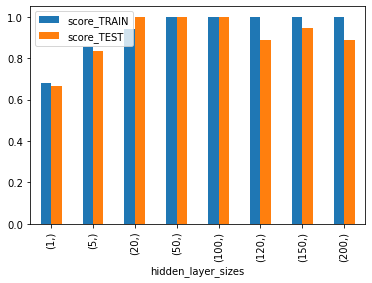

In [27]:
# Effect of hidden layer sizes while keeping max_iter and learning_rate_init constant
results.iloc[0:8].plot.bar(x = 'hidden_layer_sizes', y = ['score_TRAIN', 'score_TEST'])

<AxesSubplot:xlabel='learning_rate_init'>

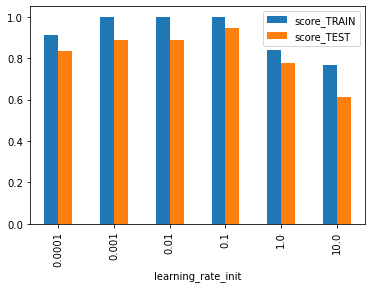

In [28]:
# Effect of learning_rate_init while keeping max_iter and hidden_layer_sizes constant
results.iloc[8:14].plot.bar(x = 'learning_rate_init', y = ['score_TRAIN', 'score_TEST'])

<AxesSubplot:xlabel='max_iter'>

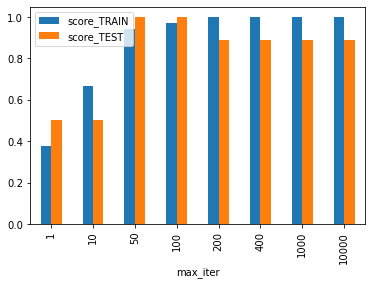

In [29]:
# Effect of max_iter while keeping learning_rate_init and hidden_layer_sizes constant
results.iloc[14:22].plot.bar(x = 'max_iter', y = ['score_TRAIN', 'score_TEST'])

# Explain Model

Generally, the following observations were discovered:
1) Changing the hyperparameters leads to change in predictive performance of the ANN model.
2) Increasing the number of neurons in the ith hidden layer leads to better ANN model until a point when the model starts overfitting and thus loss of predictive
performance on unseen data.
3) Increasing the initial learning rate (learning_rate_init) results in the loss of predictive performance of a model.
4) Increasing the maximum number of iterations (max_iter) leads to better ANN model.
